# Image Classifier with Python
##### Tutorial Reference: https://youtu.be/jztwpsIzEGc?si=fKvssCARz-9bDJeF

##### Tensorflow API: https://www.tensorflow.org/api_docs/python/tf/all_symbols

### Setup and loading data

In [ ]:
!pip install tensorflow opencv-python matplotlib pillow
# ignore tensorflow-gpu
!pip list

In [2]:
import os
import tensorflow as tf

In [3]:
# limit tensorflow use of gpu
gpus = tf.config.experimental.list_physical_devices('GPU') # lists all the available GPU devices on your machine
for gpu in gpus:
    # TensorFlow will only allocate as much GPU memory as needed, rather than reserving all the GPU memory at once
    tf.config.experimental.set_memory_growth(gpu, True)

### Remove corrupted images

In [ ]:
import cv2
import imghdr # if deprecated, use pillow
import numpy as np
from matplotlib import pyplot as plt

# from PIL import Image

In [5]:
data_directory = "data"
image_extensions = ['jpeg', 'jpg', 'bmp', 'png']

os.listdir(data_directory)
# os.listdir(os.path.join(data_directory, "puppies"))'
puppies_data_len = len(os.listdir(os.path.join(data_directory, 'frogs')))
frogs_data_len = len(os.listdir(os.path.join(data_directory, 'puppies')))
print(f"Puppies images: {puppies_data_len}, Frogs images: {frogs_data_len}")

Puppies images: 263, Frogs images: 129


In [6]:
for image_class in os.listdir(data_directory):
    for image in os.listdir(os.path.join(data_directory, image_class)):
        image_path = os.path.join(data_directory, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extensions:
                print(f"Image not in extension lists {image_path}")
                os.remove(image_path) # deletes a file
        except Exception as e:
            print(f"Cannot read image: {image_path}")

In [7]:
sample_image = cv2.imread(os.path.join('data', 'puppies', 'Aussiechon20puppy.png'))  # imread 
sample_image
# print(type(sample_image)) --> <class 'numpy.ndarray'>

array([[[ 22,  88, 127],
        [ 16,  94, 134],
        [ 13,  94, 132],
        ...,
        [  5,  79,  75],
        [  3,  75,  74],
        [  9,  72,  74]],

       [[ 18,  94, 130],
        [ 14,  94, 131],
        [ 14,  95, 132],
        ...,
        [  4,  75,  72],
        [  4,  79,  71],
        [  1,  78,  70]],

       [[ 16,  94, 130],
        [ 17,  96, 130],
        [ 16,  95, 131],
        ...,
        [  4,  77,  72],
        [  3,  79,  71],
        [  3,  80,  71]],

       ...,

       [[  3,   2,  14],
        [  1,   1,  11],
        [  0,   0,  10],
        ...,
        [ 23,  24,  42],
        [ 23,  23,  43],
        [ 25,  23,  43]],

       [[  0,   2,  16],
        [  0,   0,  11],
        [  0,   1,  12],
        ...,
        [ 20,  22,  39],
        [ 22,  21,  41],
        [ 22,  22,  42]],

       [[  1,   2,  13],
        [  1,   0,  15],
        [  2,   0,  16],
        ...,
        [ 22,  20,  38],
        [ 23,  19,  40],
        [ 20,  19,  34]]

In [8]:
sample_image.shape # (height, width, channel) 3 channels mean it's a colored image??

(816, 1456, 3)

###### This function converts the color space of the image from BGR to RGB. OpenCV (cv2) reads images in BGR format by default, but Matplotlib (plt) expects images in RGB format. 

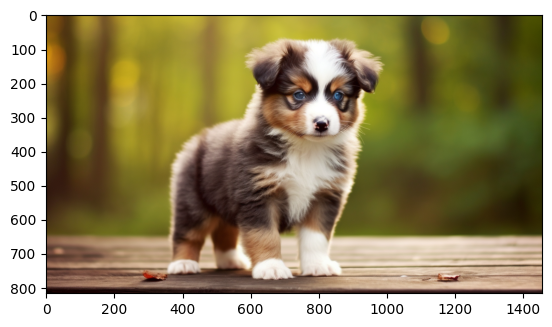

In [9]:
# plt.imshow(sample_image)
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)) 

### Loading the Data

In [10]:
tf.data.Dataset # build data pipeline; create a dataset using TensorFlow's tf.data.Dataset API

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [11]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

## Keras

###### The tf.keras.utils.image_dataset_from_directory function creates a dataset of images from a directory. It loads images, assigns labels based on subdirectory names, resizes images, and batches them for training machine learning models. The directory should have subdirectories for each class, and you can specify parameters like batch size and image size.

In [12]:
tf.keras.utils.image_dataset_from_directory # default
# tf.keras.utils.image_dataset_from_directory('data', batch_size = 8, image_size = (128, 128) # configure dataset)

<function keras.src.utils.image_dataset_utils.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, pad_to_aspect_ratio=False, data_format=None, verbose=True)>

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 392 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

data_iterator
batch[0].shape # reshaped from image_dataset_from_directory
# len(batch) # there's 2 parts to this dataset: image and label

(32, 256, 256, 3)

In [15]:
batch[1] # this is the label

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

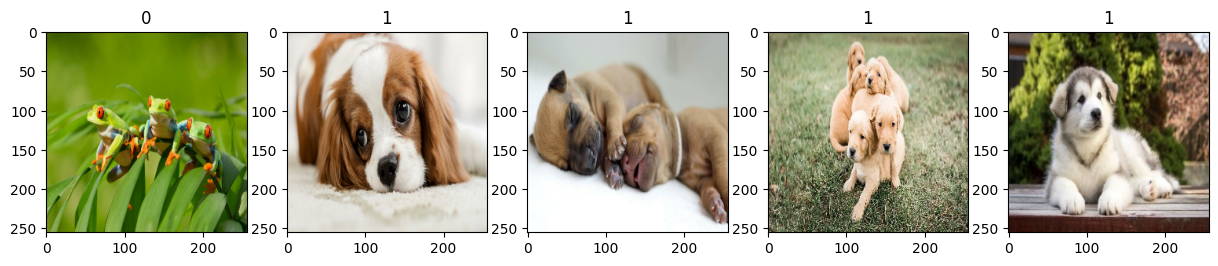

In [16]:
fig, ax = plt.subplots(ncols=5, figsize=(15,15))
for idx, img in enumerate(batch[0][:5]):
    # This line displays the image (img) in the idx-th subplot. 
    # The astype(int) method converts the image data to integer type, which is often necessary for displaying images correctly.
    ax[idx].imshow(img.astype(int))
    # This line sets the title of the idx-th subplot to the corresponding label from batch[1].
    ax[idx].title.set_text(batch[1][idx])

## Based on the images' labels, CLASS 1 = PUPPIES, 0 = FROGS

In [17]:
# get another batch 
batch = data_iterator.next()
batch[1]

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

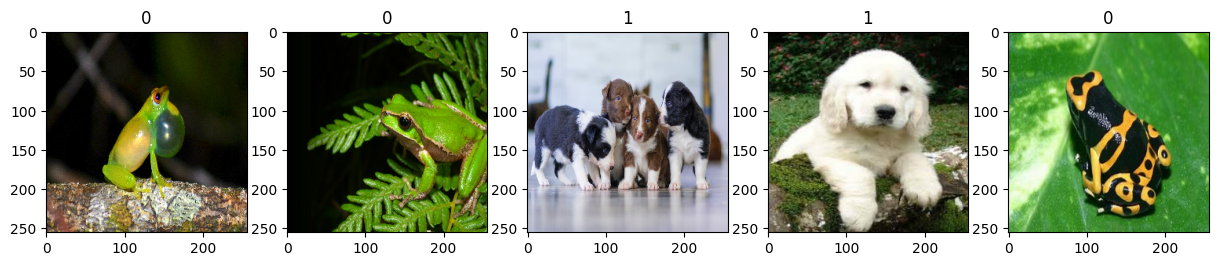

In [18]:
fig, ax = plt.subplots(ncols=5, figsize=(15,15))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocessing - Scaling image value from 0 to 1, Split data for training and testing

In [19]:
# scale = batch[0] / 255
# print(f"Min value: {scale.min()}, Max value: {scale.max()}")
data = data.map(lambda x,y: (x/255,y)) #normalizes the first element of each tuple in the data collection by dividing it by 255

In [20]:
scaled_iter = data.as_numpy_iterator()
batch = scaled_iter.next()

print(f"Min value: {batch[0].min()}, Max value: {batch[0].max()}")

Min value: 0.0, Max value: 1.0


#### X - independent variable, Y - target variable

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(15,15))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img) # note the change here
    ax[idx].title.set_text(batch[1][idx])

In [37]:
print(len(data)) # we have 13 batches

train_size = int(len(data)*0.7)
valid_size = int(len(data)*0.2)+1 # evaluate the model while training; find ways to finetune
test_size = int(len(data)*0.1)

print(f"Train size: {train_size}, Valid size: {valid_size}, Test size: {test_size}")

train = data.take(train_size) #Takes the first 70% of the data.
valid = data.skip(train_size).take(valid_size) #Skips the training data and takes the next 20% (plus one extra item).
test = data.skip(train_size+valid_size).take(test_size) #Skips both the training and validation data, taking the r|emaining 10%.

# print(f"Train size: {len(train)}, Valid size: {len(valid)}, Test size: {len(test)}") # verify

13
Train size: 9, Valid size: 3, Test size: 1


# Modeling: Build the Deep Learning Model using Keras Sequential Model

## Build deep learning model

- Sequential: This is a linear stack of layers in Keras. You can add layers to it one by one.
- Conv2D: This layer creates a convolutional kernel that is convolved with the input to produce a tensor of outputs.
- MaxPooling2D: This layer performs max pooling operation for spatial data.
- Dense: This is a regular densely-connected neural network layer.
- Flatten: This layer flattens the input, converting it into a 1D array.
- Dropout: This layer applies dropout to the input, which helps prevent overfitting.

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input

In [ ]:
MaxPooling2D??

In [46]:
model = Sequential()
model.add(Input(shape=(256, 256, 3)))
                       
# 3 convolutional layers
model.add(Conv2D(16, (3,3),1, activation='relu')) # 16 filters, 3pixels by 3pixels each filter, move 1 pixel each time
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# 1 flatten layer
model.add(Flatten())

# 1 dense layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


## Plot model performance